# 2. Sketching task

We use **CTU-13 dataset, malware capture 43**.


* [x] Build code for computing a COUNT-MIN sketch, play with different heights and widths for the Count-Min sketch matrix.
* [ ] Compare it to the RESERVOIR sampling strategy. Is it more space-efficient / accurate? What about run-time? Use the theory to explain any differences you observe.

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import pandas as pd
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from global_helper import *
from helper import *
from itertools import product
import math

## Load data

In [27]:
%%time

# Read file and preprocess columns (takes ~1.5min)
# Only loads the traffic associated with the provided IP address.
df = load_data("../data/capture20110811.pcap.netflow.labeled", keep_ip='147.32.84.165')

Wall time: 1min 25s


In [28]:
# Store original frequencies
comparison = pd.DataFrame()
comparison['all'] = df['dest_ip'].value_counts() / len(df)

## Count-Min Sketching

In [39]:
widths = [5, 10, 15, 20, 50]
depths = [2, 5, 8, 10, 20, 50]

grid = list(product(widths, depths))

In [40]:
for width, depth in grid:
    comparison['%d_%d' % (width,depth)] = count_min_sketch(df['dest_ip'], width, depth, normalize=True)

In [41]:
with pd.option_context('display.max_columns', 1000):
    with pd.option_context("display.float_format", '{:.2f}'.format):
        display(comparison.head(10))

,all,5_2,5_5,5_8,5_10,5_20,10_2,10_5,10_8,10_10,10_20,15_2,15_5,15_8,15_10,15_20,20_2,20_5,20_8,20_10,20_20,50_2,50_5,50_8,50_10,50_20,5_50,10_50,15_50,20_50,50_50
193.23.181.44,0.14,0.21,0.21,0.21,0.21,0.21,0.18,0.18,0.18,0.18,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.14,0.14,0.14,0.14,0.21,0.16,0.15,0.15,0.14
174.128.246.102,0.08,0.18,0.17,0.17,0.17,0.16,0.13,0.12,0.12,0.11,0.11,0.11,0.11,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.09,0.08,0.08,0.08,0.08,0.08,0.14,0.10,0.09,0.09,0.08
174.37.196.55,0.07,0.24,0.17,0.17,0.17,0.15,0.19,0.12,0.12,0.12,0.10,0.13,0.09,0.09,0.09,0.09,0.09,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.13,0.10,0.08,0.08,0.08
67.19.72.206,0.07,0.21,0.21,0.19,0.19,0.15,0.11,0.11,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.09,0.08,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.13,0.09,0.08,0.08,0.07
72.20.15.61,0.07,0.21,0.15,0.15,0.15,0.14,0.11,0.10,0.09,0.09,0.09,0.13,0.08,0.08,0.08,0.08,0.09,0.08,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.14,0.09,0.08,0.07,0.07
173.236.31.226,0.04,0.24,0.14,0.14,0.13,0.11,0.10,0.08,0.08,0.08,0.07,0.08,0.08,0.07,0.07,0.06,0.08,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.11,0.06,0.05,0.05,0.04
184.154.89.154,0.04,0.13,0.11,0.11,0.11,0.11,0.07,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.10,0.06,0.05,0.04,0.04
46.4.36.120,0.04,0.24,0.11,0.11,0.11,0.11,0.12,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.11,0.06,0.05,0.04,0.04
147.32.80.9,0.02,0.14,0.14,0.14,0.14,0.08,0.10,0.06,0.04,0.04,0.04,0.05,0.03,0.03,0.03,0.03,0.06,0.05,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.08,0.04,0.03,0.02,0.02
217.163.21.37,0.02,0.14,0.14,0.12,0.12,0.10,0.10,0.05,0.05,0.05,0.04,0.05,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.08,0.03,0.03,0.02,0.02


### Optimal width / depth calculation
In this section, as opposed to a grid search, we calculate the best parameters given error and certainty constraints.

Source: https://cs.stackexchange.com/q/44803

In [42]:
error     = .01  # Error of at most 0.01
certainty = .999 # with 99.9% certainty

In [43]:
w = math.ceil(2 / error)
d = math.ceil(np.log(1 - certainty) / np.log(1/2))

In [44]:
# Store original frequencies
optimal = pd.DataFrame()
optimal['all'] = df['dest_ip'].value_counts() / len(df)

In [45]:
optimal['cm_%d_%d' % (w,d)] = count_min_sketch(df['dest_ip'], w, d, normalize=True)

In [46]:
with pd.option_context('display.max_columns', 1000):
    display(optimal.head(10))

,all,cm_200_10
193.23.181.44,0.136254,0.136674
174.128.246.102,0.075716,0.076092
174.37.196.55,0.074170,0.074369
67.19.72.206,0.069265,0.069375
72.20.15.61,0.065531,0.065597
173.236.31.226,0.037737,0.038046
184.154.89.154,0.037074,0.037317
46.4.36.120,0.035947,0.036168
147.32.80.9,0.017388,0.017830
217.163.21.37,0.015488,0.015908


## Mean-Absolute Error (MAE)
Calculate the MAE per reservoir size.

In [47]:
errors = pd.Series()
errors['all'] = 0
errors.name = "MAE"

for column in comparison.columns:
    if column == 'all': continue
    
    errors[column] = np.sum(np.abs(comparison[column].fillna(0) - comparison['all'])) / len(comparison[column])
    
errors['optimal'] = np.sum(np.abs(optimal['cm_200_10'].fillna(0) - comparison['all'])) / len(optimal['cm_200_10'])

In [48]:
pd.DataFrame(errors)

,MAE
all,0.000000
5_2,0.160561
5_5,0.116209
5_8,0.108198
5_10,0.106532
5_20,0.086886
10_2,0.067213
10_5,0.043558
10_8,0.037998
10_10,0.035503


## Performance
Runtime and memory complexity.

In [50]:
# Runtime    
for width, depth in grid:
    print('Parameters: {:d} x {:d}'.format(width, depth), flush=True)
    %timeit -o count_min_sketch(df['dest_ip'], width, depth, normalize=True)

Parameters: 5 x 2
352 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 5 x 5
471 ms ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 5 x 8
599 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 5 x 10
693 ms ± 63.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 5 x 20
1.11 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 5 x 50
2.43 s ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 10 x 2
335 ms ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 10 x 5
440 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 10 x 8
580 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 10 x 10
736 ms ± 63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 10 x 20
1.11 s ± 63.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Parameters: 10 x 50
2.57 s ± 196 ms per loop (m

In [51]:
times = [352, 
471, 
599, 
693, 
1110,
2430,
335, 
440, 
580, 
736, 
1110,
2570,
320, 
441, 
598, 
703, 
1120,
2450,
316, 
450, 
563, 
649, 
1090,
2410,
354, 
487, 
616, 
708, 
1130,
2490]

In [55]:
# Memory
mems = []
for width, depth in grid:
    mems.append(count_min_sketch(df['dest_ip'], width, depth, normalize=False, show_mem=True))

In [153]:
perf_df = pd.DataFrame(errors)
perf_df.drop(['all', 'optimal'], inplace=True)
perf_df['time'] = pd.Series(times, index=perf_df.index) / 1000
perf_df['mem'] = pd.Series(mems, index=perf_df.index) / 1024

perf_df.reset_index(inplace=True)
perf_df[['width', 'depth']] = perf_df['index'].str.split('_', 1, expand=True).astype(int)

perf_df.sort_values('MAE')

,index,MAE,time,mem,width,depth
29,50_50,0.001592,2.490,19.640625,50,50
24,50_20,0.002022,0.354,0.890625,50,20
23,50_10,0.002663,2.410,7.921875,50,10
22,50_8,0.002973,1.090,3.234375,50,8
21,50_5,0.003958,0.649,1.671875,50,5
28,20_50,0.007560,1.130,7.921875,20,50
20,50_2,0.008088,0.563,1.359375,50,2
19,20_20,0.009806,0.450,0.890625,20,20
27,15_50,0.011471,0.708,4.015625,15,50
18,20_10,0.011672,0.316,0.421875,20,10


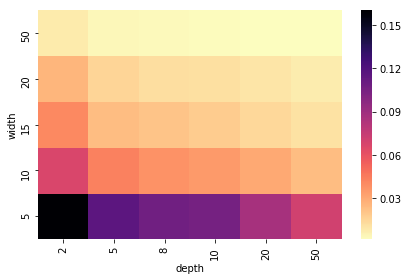

In [141]:
import seaborn as sns
ax = sns.heatmap(pd.pivot_table(perf_df, values="MAE",index=["width"], columns=["depth"], fill_value=np.nan),
                 cmap=plt.cm.magma_r)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("output_figures/sketch_hm_mae.pdf", bbox_inches='tight', pad_inches=0, dpi=150)
plt.show()

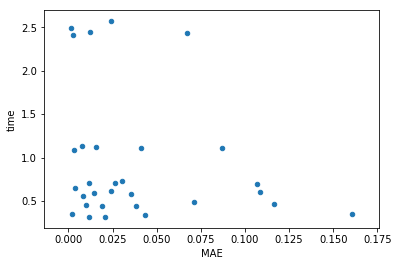

In [155]:
perf_df.plot.scatter(x='MAE', y='time')